In [70]:
import numpy as np
import math
import random
from IPython.display import clear_output
from matplotlib import pyplot as plt
import time

In [8]:
def gauss(x, means, stds):
    return sum([(1/(math.sqrt(2*math.pi))*std) * math.exp(-0.5 * ((x-mean)/std)**2) for mean, std in zip(means, stds)])

In [9]:
def generate_samples(samples, gaussians, means, stds, value, x_array = None):
    if x_array == None:
        samples = [[x, gauss(x, means, stds)] for x in np.linspace(-value, value, samples)]
    else:
        samples = [[x, gauss(x, means, stds)] for x in x_array]
    return list(map(list, zip(*samples)))

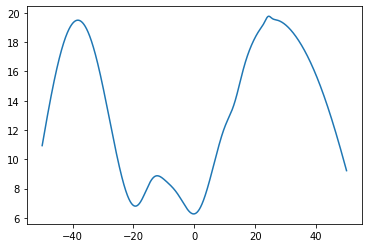

In [39]:
value = 50
gaussians = 50
means = [random.random() * 2 * value - value for _ in range(gaussians)]
stds = [random.random() * 2 * value - value for _ in range(gaussians)]
x, y = generate_samples(5000, gaussians, means, stds, value)
plt.plot(x, y)

In [41]:
cost_funct = lambda x : generate_samples(1, gaussians, means, stds, value, [x])[1][0]

In [81]:
def simulated_annealing(cost_funct, value, iterations, x, y):
    t = 0.125 * 2**iterations
    x_old = random.randint(-value, value)
    energy_old = cost_funct(x_old)
    while t>0.125:
        while True:
            x_new = random.random() * 2 * value - value
            energy_new = cost_funct(x_new)
            if energy_new <= energy_old or math.exp(-(energy_new - energy_old)/t) > random.random():
                break
        x_old = x_new
        energy_old = energy_new
        t = t/2
        clear_output(wait = True)
        plt.clf()
        plt.plot(x, y)
        plt.plot(x_old, energy_old, 'X')
        plt.show()
        time.sleep(0.5)
    return x_old

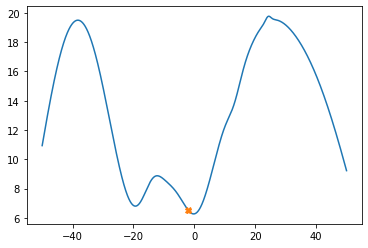

-2.1839227256828195

In [83]:
simulated_annealing(cost_funct, value, 15, x, y)